<span style="color: green; font-size: 40px; font-weight: bold;">Projeto 2 (Análise de Sentimentos)</span>

<br><br>

# Análise de Sentimentos sobre o ChatGPT no Twitter

<br>

### Contexto

Este projeto explora a **análise de sentimentos de tweets sobre o ChatGPT** para entender como o público está reagindo a essa nova tecnologia. Desde o lançamento do ChatGPT, as opiniões estão divididas, com alguns elogiando seu potencial enquanto outros demonstram receio em relação à substituição de empregos e outros aspectos sociais. A análise de sentimentos é uma ferramenta importante para medir essas reações. Este projeto utilizará o PySpark para processar e analisar grandes volumes de dados de tweets e identificar o sentimento predominante (positivo, negativo ou neutro) em relação ao ChatGPT.

<br>

### Objetivo

O objetivo deste projeto é **analisar os sentimentos dos usuários no Twitter em relação ao ChatGPT**. Utilizando dados estáticos coletados de tweets, o projeto irá aplicar `duas abordagens independentes para classificar os sentimentos`: uma utilizando a biblioteca VADER, que se baseia em regras pré-definidas para atribuir sentimentos aos textos, e outra aplicando Machine Learning, que envolve o treinamento de um modelo para aprender a classificar sentimentos com base em dados rotulados.

<br>

### Pergunta de Negócio Principal

> "**Qual é o sentimento predominante nas redes sociais, especificamente no Twitter, sobre o ChatGPT?**"

<br>

### Entregável

O entregável será **duas formas de análise de sentimentos dos tweets sobre o ChatGPT**:

- **1. Análise utilizando a biblioteca VADER**, que se baseia em uma abordagem baseada em regras para classificar os tweets como positivos, negativos ou neutros.

<br>

- **2.Análise utilizando Machine Learning**, que envolve o uso de um modelo treinado para prever o sentimento dos tweets com base em dados rotulados.


<br>

Cada abordagem será desenvolvida de maneira independente, permitindo comparar os resultados entre a análise baseada em regras e o modelo treinado.

<br>

### Sobre o Conjunto de Dados

Os `dados estáticos utilizados neste projeto foram coletados a partir de um conjunto de dados do Kaggle`, que contém **50.001 tweets** sobre o ChatGPT. As colunas principais de interesse incluem o conteúdo do tweet, o idioma, e informações sobre interações como retweets, likes, e respostas. O **conteúdo textual (coluna "Text")** será a principal variável para a análise de sentimentos.

<br> <table border="2"> <tr> <th style="text-align: center; font-size: 16px;">Nome da Coluna</th> <th style="text-align: center; font-size: 16px;">Tipo de Dado</th> <th style="text-align: center; font-size: 16px;">Descrição</th> </tr> <tr> <td>Datetime</td> <td>object</td> <td>Data e hora do tweet.</td> </tr> <tr> <td>Tweet Id</td> <td>int64</td> <td>ID único do tweet.</td> </tr> <tr> <td>Text</td> <td>object</td> <td>Conteúdo textual do tweet.</td> </tr> <tr> <td>Username</td> <td>object</td> <td>Nome de usuário do autor do tweet.</td> </tr> <tr> <td>Permalink</td> <td>object</td> <td>Link direto para o tweet.</td> </tr> <tr> <td>User</td> <td>object</td> <td>URL do perfil do autor do tweet.</td> </tr> <tr> <td>Outlinks</td> <td>object</td> <td>Links incluídos no tweet.</td> </tr> <tr> <td>CountLinks</td> <td>object</td> <td>Contagem de links no tweet.</td> </tr> <tr> <td>ReplyCount</td> <td>int64</td> <td>Número de respostas ao tweet.</td> </tr> <tr> <td>RetweetCount</td> <td>int64</td> <td>Número de retweets.</td> </tr> <tr> <td>LikeCount</td> <td>int64</td> <td>Número de likes no tweet.</td> </tr> <tr> <td>QuoteCount</td> <td>int64</td> <td>Número de vezes que o tweet foi citado.</td> </tr> <tr> <td>ConversationId</td> <td>int64</td> <td>ID da conversa relacionada ao tweet.</td> </tr> <tr> <td>Language</td> <td>object</td> <td>Idioma do tweet.</td> </tr> <tr> <td>Source</td> <td>object</td> <td>Fonte de onde o tweet foi enviado (ex: iPhone, Android).</td> </tr> <tr> <td>Media</td> <td>object</td> <td>Mídias associadas ao tweet (imagens, vídeos).</td> </tr> <tr> <td>QuotedTweet</td> <td>object</td> <td>Informações sobre o tweet citado (se houver).</td> </tr> <tr> <td>MentionedUsers</td> <td>object</td> <td>Usuários mencionados no tweet.</td> </tr> <tr> <td>hashtag</td> <td>object</td> <td>Hashtags usadas no tweet.</td> </tr> <tr> <td>hastag_counts</td> <td>int64</td> <td>Contagem de hashtags no tweet.</td> </tr> </table>

<br><br><br><br>

# Instruções para Execução do Projeto

<br><br>

## Abordagem 1: Usando Biblioteca VADER com Dataframe Pandas

#### 1. Importação e Exploração de Dados:

- **1.1 Carregamento dos Dados**: Os dados serão carregados a partir de um arquivo CSV utilizando o Apache Spark para gerar um DataFrame. Isso permite o processamento eficiente em um ambiente distribuído.
- **1.2 Exploração dos Dados**: Após o carregamento, será realizada uma análise exploratória inicial para entender a estrutura dos dados, verificar a presença de valores ausentes, linhas duplicadas e identificar possíveis caracteres especiais nas colunas de texto.

#### 2. Pré-processamento dos Dados:

- **Conversão para DataFrame Pandas**: Após o carregamento no Spark, os dados serão convertidos para um DataFrame do Pandas para facilitar o pré-processamento e a aplicação de análises de sentimentos usando a biblioteca VADER.
- **Filtragem e Seleção de Colunas**: O DataFrame será filtrado para manter apenas os tweets escritos em inglês. As colunas selecionadas para análise incluem `Datetime`, `Text`, `Username`, `Language`, e `LikeCount`.
- **Limpeza e Normalização dos Textos**: A coluna `Text` será processada para remover URLs, menções a usuários, hashtags, emojis, caracteres especiais e stopwords. Também será feita a conversão de todo o texto para letras minúsculas, garantindo que os dados estejam prontos para a análise de sentimentos.
- **Remoção de Duplicatas**: Linhas duplicadas serão removidas para garantir que não haja distorções na análise de sentimentos.

#### 3. Análise de Sentimentos com VADER:

- A biblioteca VADER será utilizada para calcular a polaridade de cada tweet e classificá-lo como positivo, negativo ou neutro, de acordo com a pontuação de sentimento (compound score). Uma nova coluna será adicionada ao DataFrame para armazenar essa classificação.

#### 4. Visualização e Interpretação:

- A distribuição dos sentimentos será visualizada através de um gráfico de barras, que mostrará a quantidade de tweets classificados em cada uma das três categorias (positivo, negativo ou neutro). A quantidade de tweets será exibida ao lado de cada barra para uma melhor interpretação visual.

#### 5. Conclusão:

- Após a análise dos dados, será feita uma comparação entre as quantidades de tweets classificados como **positivos**, **negativos** e **neutros**, para determinar o sentimento predominante sobre o ChatGPT. Além disso, será calculada a porcentagem de tweets para cada tipo de sentimento, fornecendo uma visão clara sobre a percepção pública do ChatGPT no Twitter.

- Resultado esperado: Identificar se o sentimento predominante sobre o ChatGPT é positivo, negativo ou neutro, e visualizar as porcentagens de cada categoria de sentimento.

<br><br>

## Abordagem 2: Usando VADER com PySpark UDF

#### 1. Importação e Exploração de Dados:

- **1.1 Carregamento dos Dados**: Os dados serão carregados a partir de um arquivo CSV utilizando o Apache Spark para gerar um DataFrame. O uso de Spark permite o processamento eficiente em um ambiente distribuído, otimizando operações em grandes volumes de dados.
- **1.2 Exploração dos Dados**: Após o carregamento, será realizada uma análise exploratória inicial para entender a estrutura dos dados, verificar a presença de valores ausentes e linhas duplicadas, além de identificar possíveis caracteres especiais nas colunas de texto.

#### 2. Pré-processamento dos Dados:

- **Filtragem e Seleção de Colunas**: O DataFrame será filtrado para manter apenas os tweets escritos em inglês (coluna Language com valor 'en'). As colunas selecionadas para análise incluem `Datetime`, `Text`, `Username`, `Language`, e `LikeCount`.
- **Limpeza e Normalização dos Textos**: A coluna Text será processada utilizando funções definidas pelo usuário (UDFs) para remover URLs, menções a usuários, hashtags, emojis, caracteres especiais e stopwords. O texto será convertido para letras minúsculas, garantindo que esteja pronto para a análise de sentimentos.
- **Remoção de Duplicatas**: Linhas duplicadas serão removidas para garantir que não haja distorções na análise.

#### 3. Análise de Sentimentos com VADER:

- A biblioteca VADER será utilizada para calcular a polaridade de cada tweet e classificá-lo como **positivo**, **negativo** ou **neutro**, de acordo com a pontuação de sentimento (compound score). A função de análise de sentimentos será convertida em uma UDF (User Defined Function) do PySpark, permitindo sua aplicação em cada tweet do DataFrame Spark.

#### 4. Visualização e Interpretação:

- A distribuição dos sentimentos será visualizada através de um gráfico de barras, que mostrará a quantidade de tweets classificados em cada uma das três categorias (positivo, negativo ou neutro). Os valores exatos serão exibidos ao lado de cada barra para uma melhor interpretação visual.

#### 5. Conclusão:

- Após a análise dos dados, será feita uma comparação entre as quantidades de tweets classificados como **positivos**, **negativos** ou **neutros** para determinar o sentimento predominante sobre o ChatGPT. Além disso, será calculada a porcentagem de tweets para cada tipo de sentimento, fornecendo uma visão clara sobre a percepção pública do ChatGPT no Twitter.

- Resultado esperado: Identificar o sentimento predominante sobre o ChatGPT (positivo, negativo ou neutro), acompanhado das porcentagens de cada categoria de sentimento.


<br><br>

## Abordagem 3: Usando Machine Learning

#### 1. Importação e Exploração de Dados:

- Carregue o conjunto de dados de tweets e faça uma análise exploratória para entender a estrutura dos dados e identificar possíveis valores ausentes.

#### 2. Pré-processamento dos Dados:

- Limpe os dados removendo tweets duplicados e preenchendo valores ausentes.
- Realize o processamento de texto, como a remoção de stop words, pontuações e normalização do texto.
- Filtre os tweets em inglês ou no idioma desejado.
- Rotule um subconjunto de dados manualmente (ou utilize um conjunto de dados rotulado) para treinar o modelo de Machine Learning.

#### 3. Treinamento do Modelo de Machine Learning:

- Utilize técnicas de processamento de linguagem natural (NLP) para extrair características do texto (por exemplo, TF-IDF ou vetorização).
- Aplique algoritmos de classificação de Machine Learning (por exemplo, Regressão Logística, SVM, ou Naive Bayes) para treinar um modelo de predição de sentimentos.

#### 4. Avaliação e Teste:

- Avalie a performance do modelo utilizando métricas como acurácia, precisão, recall e F1-score em um conjunto de dados de teste.
- Use o modelo treinado para classificar os tweets restantes e prever o sentimento (positivo, negativo, neutro).

#### 5. Visualização e Interpretação:

- Gere gráficos para mostrar a distribuição dos sentimentos e analise qual sentimento prevalece entre os tweets sobre o ChatGPT.

#### 6. Conclusão:

- Compare os resultados do modelo treinado com a abordagem `VADER` e determine qual método oferece uma visão mais clara ou precisa dos sentimentos em relação ao ChatGPT.

<br><br>

### Resumo

Apresente os resultados comparando as duas abordagens (VADER e Machine Learning) e determine qual sentimento predominante (positivo, negativo ou neutro) prevalece entre os tweets sobre o ChatGPT. Analise os pontos fortes e fracos de cada método para a análise de sentimentos e como eles podem ser aplicados em outras áreas.

<br><br><br>

# Importando Pacotes

In [1]:
## Importação dos pacotes necessários

# Manipulação de Dados
import pandas as pd                                                  # Manipulação e análise de dados
import numpy as np                                                   # Operações matemáticas e manipulação de arrays
import re                                                            # expressões regulares
from nltk.corpus import stopwords                                    # função para normalização do texto

# Processamento de Grandes Volumes de Dados
import pyspark                                                       # Processamento de grandes volumes de dados
from pyspark.sql import SparkSession                                 # Criação de sessões do Spark
from pyspark.sql import Row                                          # Manipulação de linhas
from pyspark.sql.functions import col                                # Manipulação de colunas no PySpark
from pyspark import SparkContext, SparkConf                          # Conecta e configura o cluster do Spark
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import isnan, when, count
from pyspark.sql.functions import udf
from pyspark.sql import functions as F
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF
from pyspark.ml import Pipeline


# Análise de Sentimentos
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # Análise de sentimentos baseada em regras

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer          # Vetorização de texto (TF-IDF)
from sklearn.model_selection import train_test_split                 # Separação dos dados em treino e teste
from sklearn.naive_bayes import MultinomialNB                        # Algoritmo Naive Bayes
from sklearn.metrics import accuracy_score, classification_report    # Avaliação de performance do modelo

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import NaiveBayes

# Visualização de Dados
import matplotlib.pyplot as plt                                      # Criação de gráficos
import seaborn as sns                                                # Visualização de dados

import nltk
nltk.download('stopwords') # dados das stopwords sejam baixados antes de usá-los.

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/eduardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Importa o findspark e inicializa
import findspark
findspark.init()  # Configura automaticamente as variáveis de ambiente para PySpark

<br> <br>

# <span style="color: green; font-size: 38px; font-weight: bold;">Preparando o Ambiente Spark</span>

In [3]:
# Definindo semente aleatória (seed) para reprodutibilidade do notebook
rnd_seed = 23
np.random.seed = rnd_seed
np.random.set_state = rnd_seed

# Se houver uma sessão Spark ativa, encerre-a
if 'sc' in globals():
    sc.stop()

if 'spark' in globals():
    spark.stop()


# Criando o Spark Context
conf = SparkConf().setAppName("Proj1") \
                  .set("spark.ui.showConsoleProgress", "false") \
                  .set("spark.executor.heartbeatInterval", "20s") \
                  .set("spark.eventLog.enabled", "false") \
                  .set("spark.sql.shuffle.partitions", "2") \
                  .set("spark.sql.debug.maxToStringFields", "100") \
                  .set("spark.executor.memory", "4g") \
                  .set("spark.driver.memory", "4g") \
                  .set("spark.driver.maxResultSize", "2g")  # Configuração adicional para limitar o tamanho do resultado

# Criar o Spark Context e a Spark Session
sc = SparkContext(conf=conf)
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# Ajustar o nível de log para ERROR
sc.setLogLevel("ERROR")

# Configurar log4j para suprimir avisos (deixar como comentário e volta ao normal)
log4j_logger = sc._jvm.org.apache.log4j
log4j_logger.LogManager.getLogger("org").setLevel(log4j_logger.Level.ERROR)
log4j_logger.LogManager.getLogger("akka").setLevel(log4j_logger.Level.ERROR)

# Visualizar o objeto spark_session
spark

24/09/09 18:40:11 WARN Utils: Your hostname, eduardo-Inspiron-15-3520 resolves to a loopback address: 127.0.1.1; using 192.168.0.13 instead (on interface wlp0s20f3)
24/09/09 18:40:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/09 18:40:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/09/09 18:40:12 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


<br><br><br><br><br><br>

# <span style="color: blue; font-size: 44px; font-weight: bold;">Abordagem 1 - Usando Biblioteca VADER</span>

- Para esta abordagem focaremos na limpeza e manipulação de dados das colunas `Text` e `Language`, garantindo que os tweets estejam no idioma correto (inglês) e que o texto seja processado para remover caracteres especiais, stop words, URLs e outros elementos que não contribuam para a análise de sentimentos.

<br><br><br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">1 Carregando os Dados</span>

- Os dados serão carregados a partir de um arquivo CSV e gerados como um DataFrame no Apache Spark. O DataFrame é uma estrutura de dados distribuída que permite o processamento paralelo em um cluster, otimizando a performance e facilitando operações avançadas como consultas SQL e manipulações de dados.

In [4]:
# Carrega os dados
dados = spark.read.csv('dados/chatgpt1.csv', inferSchema = True, header = True)

print('\n', type(dados), '\n')

# Número de registros
print(dados.count(), '\n')

# Visualiza os dados no padrão do Spark DataFrame
dados.show(5)


 <class 'pyspark.sql.dataframe.DataFrame'> 

82129 

+----------------------------------------+-------------------+---------------------------+--------+---------+----+--------+----------+----------+------------+---------+----------+--------------+--------+------+-----+-----------+--------------+-------+-------------+
|                                Datetime|           Tweet Id|                       Text|Username|Permalink|User|Outlinks|CountLinks|ReplyCount|RetweetCount|LikeCount|QuoteCount|ConversationId|Language|Source|Media|QuotedTweet|MentionedUsers|hashtag|hastag_counts|
+----------------------------------------+-------------------+---------------------------+--------+---------+----+--------+----------+----------+------------+---------+----------+--------------+--------+------+-----+-----------+--------------+-------+-------------+
|                    2023-01-22 13:44:...|1617156270871699456|ChatGPTで遊ぶの忘れてた！！|    NULL|     NULL|NULL|    NULL|      NULL|      NULL|        NULL|

In [5]:
# Visualiza as 10 primeiras linhas dos dados no formato do Pandas
dados.limit(5).toPandas()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,書類作るコード書いてみてほしいのと、,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,どこまで思考整理付き合ってくれるのかと、,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,ウミガメのスープやってみたい。,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,あとは調べ物してくれ。,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [6]:
# Schema
dados.printSchema()

root
 |-- Datetime: string (nullable = true)
 |-- Tweet Id: string (nullable = true)
 |-- Text: string (nullable = true)
 |-- Username: string (nullable = true)
 |-- Permalink: string (nullable = true)
 |-- User: string (nullable = true)
 |-- Outlinks: string (nullable = true)
 |-- CountLinks: string (nullable = true)
 |-- ReplyCount: string (nullable = true)
 |-- RetweetCount: string (nullable = true)
 |-- LikeCount: string (nullable = true)
 |-- QuoteCount: string (nullable = true)
 |-- ConversationId: string (nullable = true)
 |-- Language: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Media: string (nullable = true)
 |-- QuotedTweet: string (nullable = true)
 |-- MentionedUsers: string (nullable = true)
 |-- hashtag: string (nullable = true)
 |-- hastag_counts: string (nullable = true)



<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">1.1 Análise Exploratória Inicial dos Dados </span>

<br>

### Criação de Função Para Análise Inicial

In [7]:
def funcao_analise_inicial(df):
    # Configurar Pandas para exibir todas as linhas
    pd.set_option('display.max_rows', None)

    # Informações do DataFrame
    print('\n\n INFO \n\n')
    df.info()
    print('\n\n ------------------------------------------------------------------------------------------ \n\n')

    # Verifica se há valores ausentes e duplicados
    valores_ausentes = df.isna().sum().sum() > 0
    valores_duplicados = df.duplicated().sum() > 0

    # Nomes das variáveis com valores ausentes
    variaveis_ausentes = df.columns[df.isna().any()].tolist()

    # Número de linhas duplicadas
    num_linhas_duplicadas = df.duplicated().sum()

    # Porcentagem de linhas duplicadas
    porcentagem_linhas_duplicadas = (num_linhas_duplicadas / len(df)) * 100

    # Exibe o resultado sobre valores ausentes e duplicados
    print("\n\nExistem valores ausentes:", valores_ausentes)
    if valores_ausentes:
        print("\nVariáveis com valores ausentes:", variaveis_ausentes)
    else:
        print("\nNenhuma variável possui valores ausentes.")

    print("\n\nExistem valores duplicados:", valores_duplicados)
    if valores_duplicados:
        print("\nNúmero de Linhas Duplicadas:", num_linhas_duplicadas)
        print("\nPorcentagem de Linhas Duplicadas: {:.2f}%".format(porcentagem_linhas_duplicadas))
    else:
        print("\nNenhuma variável possui valores duplicados.")
    
    # Verificação de caracteres especiais
    caracteres_especiais = re.compile('[@_!#$%^&*<>()?/\\|}{~:]')   # nenhum caracter removido
    colunas_com_caracteres_especiais = {}

    for coluna in df.columns:
        if df[coluna].dtype == 'object':  # Verifica apenas colunas de texto
            contem_caracteres_especiais = df[coluna].apply(lambda x: bool(caracteres_especiais.search(x) if isinstance(x, str) else False)).any()
            if contem_caracteres_especiais:
                indices_com_caracteres_especiais = df[coluna][df[coluna].apply(lambda x: bool(caracteres_especiais.search(x) if isinstance(x, str) else False))].index.tolist()
                colunas_com_caracteres_especiais[coluna] = indices_com_caracteres_especiais

    # Exibe o resultado sobre caracteres especiais
    print("\n\nExistem caracteres especiais nas colunas:", bool(colunas_com_caracteres_especiais))
    if colunas_com_caracteres_especiais:
        print("\nColunas com caracteres especiais e os índices:")
        for coluna, indices in colunas_com_caracteres_especiais.items():
            print(f"\n Coluna [ {coluna} ].")
            # print(f"\n Coluna [ {coluna} ]: Índices com caracteres especiais {indices}")
    else:
        print("\nNenhuma coluna possui caracteres especiais.")

print('A função foi criada com sucesso.')

A função foi criada com sucesso.


<br>

## Convertendo Para Dataframe do Pandas

In [8]:
# Converte para Dataframe do Pandas
df_pandas = dados.toPandas()

type(df_pandas)

pandas.core.frame.DataFrame

<br>

## Aplicando a Função Inicial

In [9]:
# Chama a Função Analise inicial
funcao_analise_inicial(df_pandas)



 INFO 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82129 entries, 0 to 82128
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        82129 non-null  object
 1   Tweet Id        68529 non-null  object
 2   Text            67159 non-null  object
 3   Username        50380 non-null  object
 4   Permalink       43289 non-null  object
 5   User            42180 non-null  object
 6   Outlinks        27406 non-null  object
 7   CountLinks      28042 non-null  object
 8   ReplyCount      49478 non-null  object
 9   RetweetCount    49795 non-null  object
 10  LikeCount       49926 non-null  object
 11  QuoteCount      49965 non-null  object
 12  ConversationId  49972 non-null  object
 13  Language        39216 non-null  object
 14  Source          35450 non-null  object
 15  Media           9925 non-null   object
 16  QuotedTweet     17751 non-null  object
 17  MentionedUsers  28749 non-null  object


<br>

## Analisando Coluna `Language`

In [10]:
# Verificar quantos idiomas únicos existem na coluna 'Language'
print('Qtd Idiomas: ', df_pandas['Language'].nunique(), '\n\n')

# Verificar os 10 idiomas mais frequentes na coluna 'Language'
print(df_pandas['Language'].value_counts().head(10))

Qtd Idiomas:  4352 


en                                                                               21677
ja                                                                                2741
es                                                                                2354
fr                                                                                1673
pt                                                                                 888
de                                                                                 808
"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>"      612
und                                                                                344
tr                                                                                 302
it                                                                                 278
Name: Language, dtype: int64


<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">2. Limpeza e Manipulação dos Dados</span>

<br><br>

### Filtrando os Dados Apenas do Idioma Inglês e Selecionando Colunas


In [11]:
# Filtrar o DataFrame para manter apenas as linhas com o idioma 'en'
df_english = df_pandas[df_pandas['Language'] == 'en']

# Selecionar apenas as colunas desejadas
df_english = df_english[['Datetime', 'Text', 'Username', 'Language', 'LikeCount']]

# Verificar as primeiras linhas do DataFrame filtrado
df_english.head()

,Datetime,Text,Username,Language,LikeCount
6,2023-01-22 13:44:39+00:00,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,en,5
10,2023-01-22 13:44:49+00:00,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,en,2
15,2023-01-22 13:45:03+00:00,ChatGPT runs 10K Nvidia training GPUs with pot...,FierceElectron,en,0
16,2023-01-22 13:45:04+00:00,@SWENGDAD There is repetitive work in every jo...,xlr8harder,en,3
20,2023-01-22 13:45:07+00:00,It will look similar to irobot. The company wi...,EricRIngram,en,0


In [12]:
# Chamando Funcao Inicial
funcao_analise_inicial(df_english)



 INFO 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21677 entries, 6 to 82127
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Datetime   21677 non-null  object
 1   Text       21677 non-null  object
 2   Username   21677 non-null  object
 3   Language   21677 non-null  object
 4   LikeCount  21677 non-null  object
dtypes: object(5)
memory usage: 1016.1+ KB


 ------------------------------------------------------------------------------------------ 




Existem valores ausentes: False

Nenhuma variável possui valores ausentes.


Existem valores duplicados: True

Número de Linhas Duplicadas: 7

Porcentagem de Linhas Duplicadas: 0.03%


Existem caracteres especiais nas colunas: True

Colunas com caracteres especiais e os índices:

 Coluna [ Datetime ].

 Coluna [ Text ].

 Coluna [ Username ].


<br>

### Tratando Coluna `Text`

#### Criando Funções Para Limpar e Normalizar

In [13]:
# Função para limpar o texto
def clean_text(text):
    """
    Limpa o texto removendo URLs, menções, hashtags, emojis, pontuações,
    caracteres especiais (incluindo underline) e converte para minúsculas.
    """
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove menções (@usuário)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    # Remove emojis e pontuações, exceto apóstrofos
    text = re.sub(r'[^\w\s\']', '', text)  # Mantém letras, números, espaços e apóstrofos (remove underline)
    # Remove múltiplos espaços
    text = re.sub(r'\s+', ' ', text)
    # Remove underlines manualmente
    text = text.replace('_', '')
    # Converte para minúsculas
    text = text.lower().strip()  # Remove espaços no início e no final
    
    return text

# Função para remover stopwords
def remove_stopwords(text):
    """
    Remove stopwords (palavras comuns) do texto para focar nas palavras mais relevantes.
    """
    stop_words = set(stopwords.words('english'))  # Carregar as stopwords em inglês
    words = text.split()                                                          # Dividir o texto em palavras
    filtered_text = ' '.join([word for word in words if word not in stop_words])  # Remover stopwords
    
    return filtered_text

print('Funções criadas com sucesso.\n')

Funções criadas com sucesso.



In [14]:
# Aplicar a função de limpeza e normalização de texto
df_english['Text'] = df_english['Text'].apply(clean_text)
df_english['Text'] = df_english['Text'].apply(remove_stopwords)

print('Funções aplicadas.\n')

Funções aplicadas.



<br>

### Removendo Linhas Duplicadas

In [15]:
# Verificar a quantidade de linhas duplicadas
qtd_duplicadas_antes = df_english.duplicated().sum()
print(f"Quantidade de linhas duplicadas antes de remover: {qtd_duplicadas_antes}")

# Remover as linhas duplicadas
df_english = df_english.drop_duplicates()

# Verificar a quantidade de linhas duplicadas novamente
qtd_duplicadas_depois = df_english.duplicated().sum()
print(f"Quantidade de linhas duplicadas após remover: {qtd_duplicadas_depois}")

Quantidade de linhas duplicadas antes de remover: 13
Quantidade de linhas duplicadas após remover: 0


In [16]:
# Chamando Funcao Inicial
funcao_analise_inicial(df_english)



 INFO 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21664 entries, 6 to 82127
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Datetime   21664 non-null  object
 1   Text       21664 non-null  object
 2   Username   21664 non-null  object
 3   Language   21664 non-null  object
 4   LikeCount  21664 non-null  object
dtypes: object(5)
memory usage: 1015.5+ KB


 ------------------------------------------------------------------------------------------ 




Existem valores ausentes: False

Nenhuma variável possui valores ausentes.


Existem valores duplicados: False

Nenhuma variável possui valores duplicados.


Existem caracteres especiais nas colunas: True

Colunas com caracteres especiais e os índices:

 Coluna [ Datetime ].

 Coluna [ Username ].


<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">3. Aplicar Análise de Sentimentos com VADER</span>

<br><br>

#### Criando Função Para Aplicar a Análise de Sentimentos em Cada Tweet

In [17]:
# Inicializar o analisador de sentimentos VADER
analyzer = SentimentIntensityAnalyzer()

# Função para aplicar a análise de sentimentos em cada tweet
def apply_vader(text):
    """
    Recebe o texto de um tweet, calcula a pontuação de sentimento usando VADER
    e retorna a classificação (positivo, neutro ou negativo).
    """
    scores = analyzer.polarity_scores(text)  # Obter as pontuações de sentimento
    compound = scores['compound']            # O "compound" é a pontuação geral de sentimento
    
    if compound >= 0.05:
        return 'positivo'
    elif compound <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

# Aplicar a função de análise de sentimentos ao DataFrame
df_english['Sentimento'] = df_english['Text'].apply(apply_vader)

# Verificar as primeiras linhas para confirmar a nova coluna
df_english.head(5)

,Datetime,Text,Username,Language,LikeCount,Sentimento
6,2023-01-22 13:44:39+00:00,prohibition chatgpt added honor code daughters...,Caput_LupinumSG,en,5,positivo
10,2023-01-22 13:44:49+00:00,bow chatgpt,Vishwasrisiri,en,2,neutro
15,2023-01-22 13:45:03+00:00,chatgpt runs 10k nvidia training gpus potentia...,FierceElectron,en,0,neutro
16,2023-01-22 13:45:04+00:00,repetitive work every job lots small tasks lev...,xlr8harder,en,3,negativo
20,2023-01-22 13:45:07+00:00,look similar irobot company install mini fridg...,EricRIngram,en,0,positivo


<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">4. Visualização dos Resultados</span>

<br>

#### Visualizando por Gráfico

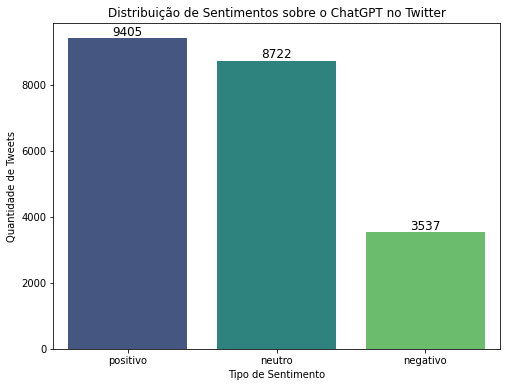

In [18]:
# Contar a quantidade de tweets por tipo de sentimento
sentiment_counts = df_english['Sentimento'].value_counts()

# Plotar um gráfico de barras para visualizar a distribuição dos sentimentos
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Adicionar os valores ao lado direito de cada barra
for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=12)

# Configurar o gráfico
plt.title('Distribuição de Sentimentos sobre o ChatGPT no Twitter')
plt.xlabel('Tipo de Sentimento')
plt.ylabel('Quantidade de Tweets')

# Mostrar o gráfico
plt.show()

<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">5. Conclusão</span>

<br>

#### Exibindo os Resultados

In [19]:
# Exibir a contagem dos tipos de sentimentos
print("\nContagem dos Sentimentos:")
print(sentiment_counts)

# Conclusão sobre o sentimento predominante
sentimento_predominante = sentiment_counts.idxmax()
print(f"\nO sentimento predominante sobre o ChatGPT é: {sentimento_predominante.capitalize()}")

# Exibir a porcentagem de tweets para cada sentimento
sentiment_percentage = (sentiment_counts / len(df_english)) * 100
print("\nPorcentagem de cada sentimento:")
print(sentiment_percentage)


Contagem dos Sentimentos:
positivo    9405
neutro      8722
negativo    3537
Name: Sentimento, dtype: int64

O sentimento predominante sobre o ChatGPT é: Positivo

Porcentagem de cada sentimento:
positivo    43.413035
neutro      40.260340
negativo    16.326625
Name: Sentimento, dtype: float64


<br><br><br><br><br><br>

# <span style="color: blue; font-size: 42px; font-weight: bold;">Abordagem 2 - Usando VADER com PySpark UDF</span>


<br><br><br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">1 Carregando os Dados</span>

- Os dados serão carregados a partir de um arquivo CSV e gerados como um DataFrame no Apache Spark. O DataFrame é uma estrutura de dados distribuída que permite o processamento paralelo em um cluster, otimizando a performance e facilitando operações avançadas como consultas SQL e manipulações de dados.

In [20]:
# Carrega os dados
dados = spark.read.csv('dados/chatgpt1.csv', inferSchema = True, header = True)

print('\n', type(dados), '\n')

# Número de registros
print(dados.count(), '\n')

# Visualiza os dados no padrão do Spark DataFrame
dados.show(2)


 <class 'pyspark.sql.dataframe.DataFrame'> 

82129 

+------------------------------------+-------------------+---------------------------+--------+---------+----+--------+----------+----------+------------+---------+----------+--------------+--------+------+-----+-----------+--------------+-------+-------------+
|                            Datetime|           Tweet Id|                       Text|Username|Permalink|User|Outlinks|CountLinks|ReplyCount|RetweetCount|LikeCount|QuoteCount|ConversationId|Language|Source|Media|QuotedTweet|MentionedUsers|hashtag|hastag_counts|
+------------------------------------+-------------------+---------------------------+--------+---------+----+--------+----------+----------+------------+---------+----------+--------------+--------+------+-----+-----------+--------------+-------+-------------+
|                2023-01-22 13:44:...|1617156270871699456|ChatGPTで遊ぶの忘れてた！！|    NULL|     NULL|NULL|    NULL|      NULL|      NULL|        NULL|     NULL|      

In [21]:
# Schema
dados.printSchema()

root
 |-- Datetime: string (nullable = true)
 |-- Tweet Id: string (nullable = true)
 |-- Text: string (nullable = true)
 |-- Username: string (nullable = true)
 |-- Permalink: string (nullable = true)
 |-- User: string (nullable = true)
 |-- Outlinks: string (nullable = true)
 |-- CountLinks: string (nullable = true)
 |-- ReplyCount: string (nullable = true)
 |-- RetweetCount: string (nullable = true)
 |-- LikeCount: string (nullable = true)
 |-- QuoteCount: string (nullable = true)
 |-- ConversationId: string (nullable = true)
 |-- Language: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Media: string (nullable = true)
 |-- QuotedTweet: string (nullable = true)
 |-- MentionedUsers: string (nullable = true)
 |-- hashtag: string (nullable = true)
 |-- hastag_counts: string (nullable = true)



<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">1.1 Análise Exploratória Inicial dos Dados </span>

<br>

### Criação de Função Para Análise Inicial

In [22]:
def funcao_analise_inicial(df):
    # Exibir o esquema do DataFrame
    print("\n\n INFO \n\n")
    df.printSchema()

    # Número total de registros
    print(f"\nNúmero total de registros: {df.count()}")
    
    # Verificar valores ausentes
    print("\n\nVerificando valores ausentes:\n")
    df_ausentes = df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns])
    df_ausentes.show()

    # Verificar valores duplicados
    num_linhas_duplicadas = df.count() - df.dropDuplicates().count()
    porcentagem_linhas_duplicadas = (num_linhas_duplicadas / df.count()) * 100
    print(f"\n\nExistem valores duplicados: {num_linhas_duplicadas > 0}")
    if num_linhas_duplicadas > 0:
        print(f"Número de Linhas Duplicadas: {num_linhas_duplicadas}")
        print(f"Porcentagem de Linhas Duplicadas: {porcentagem_linhas_duplicadas:.2f}%")
    else:
        print("Nenhuma variável possui valores duplicados.")

    # Verificação de caracteres especiais
    caracteres_especiais = re.compile('[@_!#$%^&*<>()?/\\|}{~:]')
    colunas_com_caracteres_especiais = {}

    # Iterar sobre colunas do tipo string
    for coluna in df.columns:
        if dict(df.dtypes)[coluna] == 'string':
            contem_caracteres_especiais = df.filter(df[coluna].rlike('[@_!#$%^&*<>()?/\\|}{~:]')).count() > 0
            if contem_caracteres_especiais:
                indices_com_caracteres_especiais = df.filter(df[coluna].rlike('[@_!#$%^&*<>()?/\\|}{~:]')).select(coluna).rdd.map(lambda row: row[coluna]).collect()
                colunas_com_caracteres_especiais[coluna] = indices_com_caracteres_especiais

    # Exibe o resultado sobre caracteres especiais
    print("\n\nExistem caracteres especiais nas colunas:", bool(colunas_com_caracteres_especiais))
    if colunas_com_caracteres_especiais:
        print("\nColunas com caracteres especiais e exemplos de valores:")
        for coluna, indices in colunas_com_caracteres_especiais.items():
            print(f"\n Coluna [ {coluna} ]")
            # print(f"\n Coluna [ {coluna} ]: Exemplo de valores com caracteres especiais: {indices[:5]}")
    else:
        print("\nNenhuma coluna possui caracteres especiais.")

print('A função foi criada com sucesso.')

A função foi criada com sucesso.


<br>

## Aplicando a Função Inicial

In [23]:
# Chama a Função Analise inicial
funcao_analise_inicial(dados)



 INFO 


root
 |-- Datetime: string (nullable = true)
 |-- Tweet Id: string (nullable = true)
 |-- Text: string (nullable = true)
 |-- Username: string (nullable = true)
 |-- Permalink: string (nullable = true)
 |-- User: string (nullable = true)
 |-- Outlinks: string (nullable = true)
 |-- CountLinks: string (nullable = true)
 |-- ReplyCount: string (nullable = true)
 |-- RetweetCount: string (nullable = true)
 |-- LikeCount: string (nullable = true)
 |-- QuoteCount: string (nullable = true)
 |-- ConversationId: string (nullable = true)
 |-- Language: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Media: string (nullable = true)
 |-- QuotedTweet: string (nullable = true)
 |-- MentionedUsers: string (nullable = true)
 |-- hashtag: string (nullable = true)
 |-- hastag_counts: string (nullable = true)


Número total de registros: 82129


Verificando valores ausentes:

+--------+--------+-----+--------+---------+-----+--------+----------+----------+------------+----

<br>

## Analisando Coluna `Language`

In [24]:
# Verificar quantos idiomas únicos existem na coluna 'Language'
qtd_idiomas = dados.select("Language").distinct().count()
print('Qtd Idiomas: ', qtd_idiomas, '\n\n')

# Verificar os 10 idiomas mais frequentes na coluna 'Language'
idiomas_frequentes = dados.groupBy("Language").count().orderBy(F.desc("count")).limit(10)
idiomas_frequentes.show()

Qtd Idiomas:  4353 


+--------------------+-----+
|            Language|count|
+--------------------+-----+
|                NULL|42913|
|                  en|21677|
|                  ja| 2741|
|                  es| 2354|
|                  fr| 1673|
|                  pt|  888|
|                  de|  808|
|"<a href=""https:...|  612|
|                 und|  344|
|                  tr|  302|
+--------------------+-----+



<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">2. Limpeza e Manipulação dos Dados</span>

<br><br>

### Filtrando os Dados Apenas do Idioma Inglês e Selecionando Colunas


In [25]:
# Filtrar o DataFrame para manter apenas as linhas com o idioma 'en'
df_english = dados.filter(dados['Language'] == 'en')

# Selecionar apenas as colunas desejadas
df_english = df_english.select('Datetime', 'Text', 'Username', 'Language', 'LikeCount')

# Verificar as primeiras linhas do DataFrame filtrado
df_english.show(5)

+--------------------+--------------------+---------------+--------+---------+
|            Datetime|                Text|       Username|Language|LikeCount|
+--------------------+--------------------+---------------+--------+---------+
|2023-01-22 13:44:...|@AlexandrovnaIng ...|Caput_LupinumSG|      en|        5|
|2023-01-22 13:44:...|Bow down to chatG...|  Vishwasrisiri|      en|        2|
|2023-01-22 13:45:...|ChatGPT runs 10K ...| FierceElectron|      en|        0|
|2023-01-22 13:45:...|@SWENGDAD There i...|     xlr8harder|      en|        3|
|2023-01-22 13:45:...|It will look simi...|    EricRIngram|      en|        0|
+--------------------+--------------------+---------------+--------+---------+
only showing top 5 rows



<br>

### Tratando Coluna `Text`

#### Criando Funções Para Limpar e Normalizar

In [26]:
# Função para limpar o texto
def clean_text(text):
    """
    Limpa o texto removendo URLs, menções, hashtags, emojis, pontuações,
    caracteres especiais (incluindo underline) e converte para minúsculas.
    """
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove menções (@usuário)
    text = re.sub(r'#\w+', '', text)  # Remove hashtags (#)
    text = re.sub(r'[^\w\s\']', '', text)  # Remove emojis e pontuações, exceto apóstrofos
    text = re.sub(r'\s+', ' ', text)  # Remove múltiplos espaços
    text = text.replace('_', '')  # Remove underlines manualmente
    text = text.lower().strip()  # Converte para minúsculas e remove espaços extras
    return text

# Função para remover stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    """
    Remove stopwords (palavras comuns) do texto para focar nas palavras mais relevantes.
    """
    words = text.split()
    filtered_text = ' '.join([word for word in words if word not in stop_words])
    return filtered_text

# Converter as funções para UDFs (User Defined Functions) no PySpark
clean_text_udf = udf(lambda text: clean_text(text), StringType())
remove_stopwords_udf = udf(lambda text: remove_stopwords(text), StringType())

print('Etapa concluída.')

Etapa concluída.


In [27]:
# Aplicar as funções de limpeza e normalização de texto ao DataFrame
df_english = df_english.withColumn('Text', clean_text_udf(col('Text')))
df_english = df_english.withColumn('Text', remove_stopwords_udf(col('Text')))

# Exibir as primeiras linhas após a aplicação das funções
df_english.show(5)

+--------------------+--------------------+---------------+--------+---------+
|            Datetime|                Text|       Username|Language|LikeCount|
+--------------------+--------------------+---------------+--------+---------+
|2023-01-22 13:44:...|prohibition chatg...|Caput_LupinumSG|      en|        5|
|2023-01-22 13:44:...|         bow chatgpt|  Vishwasrisiri|      en|        2|
|2023-01-22 13:45:...|chatgpt runs 10k ...| FierceElectron|      en|        0|
|2023-01-22 13:45:...|repetitive work e...|     xlr8harder|      en|        3|
|2023-01-22 13:45:...|look similar irob...|    EricRIngram|      en|        0|
+--------------------+--------------------+---------------+--------+---------+
only showing top 5 rows



<br>

### Removendo Linhas Duplicadas

In [28]:
# Verificar a quantidade de linhas duplicadas antes de remover
qtd_duplicadas_antes = df_english.count() - df_english.dropDuplicates().count()
print(f"Quantidade de linhas duplicadas antes de remover: {qtd_duplicadas_antes}")

# Remover as linhas duplicadas
df_english = df_english.dropDuplicates()

# Verificar a quantidade de linhas duplicadas novamente
qtd_duplicadas_depois = df_english.count() - df_english.dropDuplicates().count()
print(f"Quantidade de linhas duplicadas após remover: {qtd_duplicadas_depois}")

Quantidade de linhas duplicadas antes de remover: 13
Quantidade de linhas duplicadas após remover: 0


In [29]:
# Chama a Função Analise inicial
funcao_analise_inicial(df_english)



 INFO 


root
 |-- Datetime: string (nullable = true)
 |-- Text: string (nullable = true)
 |-- Username: string (nullable = true)
 |-- Language: string (nullable = true)
 |-- LikeCount: string (nullable = true)


Número total de registros: 21664


Verificando valores ausentes:

+--------+----+--------+--------+---------+
|Datetime|Text|Username|Language|LikeCount|
+--------+----+--------+--------+---------+
|       0|   0|       0|       0|        0|
+--------+----+--------+--------+---------+



Existem valores duplicados: False
Nenhuma variável possui valores duplicados.


Existem caracteres especiais nas colunas: True

Colunas com caracteres especiais e exemplos de valores:

 Coluna [ Datetime ]

 Coluna [ Username ]


<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">3. Aplicar Análise de Sentimentos com VADER</span>

<br><br>

#### Criando Função Para Aplicar a Análise de Sentimentos em Cada Tweet

In [30]:
# Inicializar o analisador de sentimentos VADER
analyzer = SentimentIntensityAnalyzer()

# Função para aplicar a análise de sentimentos em cada tweet
def apply_vader(text):
    """
    Recebe o texto de um tweet, calcula a pontuação de sentimento usando VADER
    e retorna a classificação (positivo, neutro ou negativo).
    """
    scores = analyzer.polarity_scores(text)  # Obter as pontuações de sentimento
    compound = scores['compound']            # O "compound" é a pontuação geral de sentimento
    
    if compound >= 0.05:
        return 'positivo'
    elif compound <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

# Criar uma UDF (User Defined Function) para aplicar o VADER ao PySpark
vader_udf = udf(apply_vader, StringType())

# Aplicar a função de análise de sentimentos ao DataFrame Spark
df_english = df_english.withColumn("Sentimento", vader_udf(df_english["Text"]))

# Verificar as primeiras linhas para confirmar a nova coluna
df_english.show(5)

+--------------------+--------------------+---------------+--------+---------+----------+
|            Datetime|                Text|       Username|Language|LikeCount|Sentimento|
+--------------------+--------------------+---------------+--------+---------+----------+
|2023-01-22 13:44:...|prohibition chatg...|Caput_LupinumSG|      en|        5|  positivo|
|2023-01-22 13:45:...|chatgpt runs 10k ...| FierceElectron|      en|        0|    neutro|
|2023-01-22 13:45:...|look similar irob...|    EricRIngram|      en|        0|  positivo|
|2023-01-22 13:46:...|google freaking c...|       FamsMert|      en|        0|  negativo|
|Professor of Ling...|search easy sensa...|     Pup_In_Cup|      en|        0|  positivo|
+--------------------+--------------------+---------------+--------+---------+----------+
only showing top 5 rows



<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">4. Visualização dos Resultados</span>

<br>

#### Visualizando por Gráfico

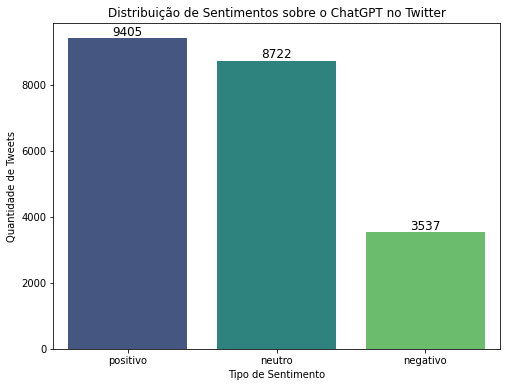

In [31]:
# Contar a quantidade de tweets por tipo de sentimento
sentiment_counts = df_english.groupBy("Sentimento").count().orderBy("count", ascending=False)

# Coletar os resultados para visualização em gráfico
sentiment_counts_pandas = sentiment_counts.toPandas()

# Plotar um gráfico de barras para visualizar a distribuição dos sentimentos
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts_pandas['Sentimento'], y=sentiment_counts_pandas['count'], palette='viridis')

# Adicionar os valores ao lado direito de cada barra
for index, value in enumerate(sentiment_counts_pandas['count']):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=12)

# Configurar o gráfico
plt.title('Distribuição de Sentimentos sobre o ChatGPT no Twitter')
plt.xlabel('Tipo de Sentimento')
plt.ylabel('Quantidade de Tweets')

# Mostrar o gráfico
plt.show()

<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">5. Conclusão</span>

<br>

#### Exibindo os Resultados

In [32]:
# Exibir a contagem dos tipos de sentimentos
print("\nContagem dos Sentimentos:")
sentiment_counts.show()

# Conclusão sobre o sentimento predominante
sentimento_predominante = sentiment_counts.orderBy("count", ascending=False).first()["Sentimento"]
print(f"\nO sentimento predominante sobre o ChatGPT é: {sentimento_predominante.capitalize()}")

# Calcular a porcentagem de tweets para cada sentimento
total_tweets = df_english.count()
sentiment_percentage = sentiment_counts.withColumn("percentage", (sentiment_counts["count"] / total_tweets) * 100)

# Exibir a porcentagem de cada sentimento
print("\nPorcentagem de cada sentimento:")
sentiment_percentage.show()


Contagem dos Sentimentos:
+----------+-----+
|Sentimento|count|
+----------+-----+
|  positivo| 9405|
|    neutro| 8722|
|  negativo| 3537|
+----------+-----+


O sentimento predominante sobre o ChatGPT é: Positivo

Porcentagem de cada sentimento:
+----------+-----+------------------+
|Sentimento|count|        percentage|
+----------+-----+------------------+
|  positivo| 9405|43.413035450516986|
|    neutro| 8722| 40.26033973412112|
|  negativo| 3537| 16.32662481536189|
+----------+-----+------------------+



<br>

#### Salvando Resultados

In [33]:
# Converter os DataFrames PySpark para Pandas
df_english_pandas = df_english.toPandas()
sentiment_counts_pandas = sentiment_counts.toPandas()

# Defina o caminho da pasta onde deseja salvar os arquivos
output_folder = "resultados/"

# Salvar o DataFrame df_english como CSV
df_english_pandas.to_csv(f"{output_folder}/df_english.csv", index=False)

# Salvar o DataFrame sentiment_counts como CSV
sentiment_counts_pandas.to_csv(f"{output_folder}/sentiment_counts.csv", index=False)

print('Arquivos salvos com sucesso.')

Arquivos salvos com sucesso.


<br><br><br><br><br><br>

# <span style="color: blue; font-size: 44px; font-weight: bold;">Abordagem 3 - Aplicando Machine Learning</span>

<br><br><br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">1 Carregando os Dados</span>

- Os dados serão carregados a partir de um arquivo CSV e gerados como um DataFrame no Apache Spark. O DataFrame é uma estrutura de dados distribuída que permite o processamento paralelo em um cluster, otimizando a performance e facilitando operações avançadas como consultas SQL e manipulações de dados.

In [34]:
# Carrega os dados
dados = spark.read.csv('dados/chatgpt1.csv', inferSchema = True, header = True)

print('\n', type(dados), '\n')

# Número de registros
print(dados.count(), '\n')

# Visualiza os dados no padrão do Spark DataFrame
dados.show(2)


 <class 'pyspark.sql.dataframe.DataFrame'> 

82129 

+------------------------------------+-------------------+---------------------------+--------+---------+----+--------+----------+----------+------------+---------+----------+--------------+--------+------+-----+-----------+--------------+-------+-------------+
|                            Datetime|           Tweet Id|                       Text|Username|Permalink|User|Outlinks|CountLinks|ReplyCount|RetweetCount|LikeCount|QuoteCount|ConversationId|Language|Source|Media|QuotedTweet|MentionedUsers|hashtag|hastag_counts|
+------------------------------------+-------------------+---------------------------+--------+---------+----+--------+----------+----------+------------+---------+----------+--------------+--------+------+-----+-----------+--------------+-------+-------------+
|                2023-01-22 13:44:...|1617156270871699456|ChatGPTで遊ぶの忘れてた！！|    NULL|     NULL|NULL|    NULL|      NULL|      NULL|        NULL|     NULL|      

In [35]:
# Visualiza as 10 primeiras linhas dos dados no formato do Pandas
dados.limit(2).toPandas()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,書類作るコード書いてみてほしいのと、,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">1.1 Análise Exploratória Inicial dos Dados </span>

<br>

### Criação de Função Para Análise Inicial

In [36]:
def funcao_analise_inicial(df):
    # Exibir o esquema do DataFrame
    print("\n\n INFO \n\n")
    df.printSchema()

    # Número total de registros
    print(f"\nNúmero total de registros: {df.count()}")
    
    # Verificar valores ausentes
    print("\n\nVerificando valores ausentes:\n")
    df_ausentes = df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns])
    df_ausentes.show()

    # Verificar valores duplicados
    num_linhas_duplicadas = df.count() - df.dropDuplicates().count()
    porcentagem_linhas_duplicadas = (num_linhas_duplicadas / df.count()) * 100
    print(f"\n\nExistem valores duplicados: {num_linhas_duplicadas > 0}")
    if num_linhas_duplicadas > 0:
        print(f"Número de Linhas Duplicadas: {num_linhas_duplicadas}")
        print(f"Porcentagem de Linhas Duplicadas: {porcentagem_linhas_duplicadas:.2f}%")
    else:
        print("Nenhuma variável possui valores duplicados.")

    # Verificação de caracteres especiais
    caracteres_especiais = re.compile('[@_!#$%^&*<>()?/\\|}{~:]')
    colunas_com_caracteres_especiais = {}

    # Iterar sobre colunas do tipo string
    for coluna in df.columns:
        if dict(df.dtypes)[coluna] == 'string':
            contem_caracteres_especiais = df.filter(df[coluna].rlike('[@_!#$%^&*<>()?/\\|}{~:]')).count() > 0
            if contem_caracteres_especiais:
                indices_com_caracteres_especiais = df.filter(df[coluna].rlike('[@_!#$%^&*<>()?/\\|}{~:]')).select(coluna).rdd.map(lambda row: row[coluna]).collect()
                colunas_com_caracteres_especiais[coluna] = indices_com_caracteres_especiais

    # Exibe o resultado sobre caracteres especiais
    print("\n\nExistem caracteres especiais nas colunas:", bool(colunas_com_caracteres_especiais))
    if colunas_com_caracteres_especiais:
        print("\nColunas com caracteres especiais e exemplos de valores:")
        for coluna, indices in colunas_com_caracteres_especiais.items():
            print(f"\n Coluna [ {coluna} ]")
            # print(f"\n Coluna [ {coluna} ]: Exemplo de valores com caracteres especiais: {indices[:5]}")
    else:
        print("\nNenhuma coluna possui caracteres especiais.")

print('A função foi criada com sucesso.')

A função foi criada com sucesso.


<br>

## Aplicando a Função Inicial

In [37]:
# Chama a Função Analise inicial
# funcao_analise_inicial(dados)

<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">2. Limpeza e Manipulação dos Dados</span>

<br><br>

### Filtrando os Dados Apenas do Idioma Inglês e Selecionando Colunas

In [38]:
# Filtrar o DataFrame para manter apenas as linhas com o idioma 'en'
df_english = dados.filter(dados['Language'] == 'en')

# Selecionar colunas relevantes
df_english = df_english.select('Text', 'ReplyCount', 'RetweetCount', 'LikeCount')

print('Etapa concluída.')

Etapa concluída.


<br>

### Tratando Coluna `Text`

#### Criando Funções Para Limpar e Normalizar

In [39]:
# Função para limpar o texto
def clean_text(text):
    """
    Limpa o texto removendo URLs, menções, hashtags, emojis, pontuações,
    caracteres especiais (incluindo underline) e converte para minúsculas.
    """
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove menções (@usuário)
    text = re.sub(r'#\w+', '', text)  # Remove hashtags (#)
    text = re.sub(r'[^\w\s\']', '', text)  # Remove emojis e pontuações, exceto apóstrofos
    text = re.sub(r'\s+', ' ', text)  # Remove múltiplos espaços
    text = text.replace('_', '')  # Remove underlines manualmente
    text = text.lower().strip()  # Converte para minúsculas e remove espaços extras
    return text

# Função para remover stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    """
    Remove stopwords (palavras comuns) do texto para focar nas palavras mais relevantes.
    """
    words = text.split()
    filtered_text = ' '.join([word for word in words if word not in stop_words])
    return filtered_text

# Converter as funções para UDFs (User Defined Functions) no PySpark
clean_text_udf = udf(lambda text: clean_text(text), StringType())
remove_stopwords_udf = udf(lambda text: remove_stopwords(text), StringType())

# Função para converter colunas para tipo numérico
def convert_columns_to_numeric(df, columns):
    for column in columns:
        df = df.withColumn(column, col(column).cast(IntegerType()))
    return df


print('Etapa concluída.\n')

Etapa concluída.



In [40]:
# Aplicar as funções de limpeza e normalização de texto ao DataFrame
df_english = df_english.withColumn('Text', clean_text_udf(col('Text')))
df_english = df_english.withColumn('Text', remove_stopwords_udf(col('Text')))

# Colunas a serem convertidas para tipo numérico
columns_to_convert = ['ReplyCount', 'RetweetCount', 'LikeCount']

# Aplicar a função no dataframe df_english
df_english = convert_columns_to_numeric(df_english, columns_to_convert)

# Exibir as primeiras linhas após a aplicação das funções
df_english.show(2)

+--------------------+----------+------------+---------+
|                Text|ReplyCount|RetweetCount|LikeCount|
+--------------------+----------+------------+---------+
|prohibition chatg...|         1|           0|        5|
|         bow chatgpt|         0|           0|        2|
+--------------------+----------+------------+---------+
only showing top 2 rows



In [41]:
# Chama a Função Analise inicial
funcao_analise_inicial(df_english)



 INFO 


root
 |-- Text: string (nullable = true)
 |-- ReplyCount: integer (nullable = true)
 |-- RetweetCount: integer (nullable = true)
 |-- LikeCount: integer (nullable = true)


Número total de registros: 21677


Verificando valores ausentes:

+----+----------+------------+---------+
|Text|ReplyCount|RetweetCount|LikeCount|
+----+----------+------------+---------+
|   0|         0|           0|        0|
+----+----------+------------+---------+



Existem valores duplicados: True
Número de Linhas Duplicadas: 2367
Porcentagem de Linhas Duplicadas: 10.92%


Existem caracteres especiais nas colunas: False

Nenhuma coluna possui caracteres especiais.


<br>

### Removendo Linhas Duplicadas

In [42]:
# Verificar a quantidade de linhas duplicadas antes de remover
qtd_duplicadas_antes = df_english.count() - df_english.dropDuplicates().count()
print(f"Quantidade de linhas duplicadas antes de remover: {qtd_duplicadas_antes}")

# Remover as linhas duplicadas
df_english = df_english.dropDuplicates()

# Verificar a quantidade de linhas duplicadas novamente
qtd_duplicadas_depois = df_english.count() - df_english.dropDuplicates().count()
print(f"Quantidade de linhas duplicadas após remover: {qtd_duplicadas_depois}")

Quantidade de linhas duplicadas antes de remover: 2367
Quantidade de linhas duplicadas após remover: 0


<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">3. Aplicar Análise de Sentimentos com VADER</span>

<br><br>

#### Criando Função Para Aplicar a Análise de Sentimentos em Cada Tweet

In [43]:
# Inicializar o analisador de sentimentos VADER
analyzer = SentimentIntensityAnalyzer()

# Função para aplicar a análise de sentimentos em cada tweet
def apply_vader(text):
    """
    Recebe o texto de um tweet, calcula a pontuação de sentimento usando VADER
    e retorna a classificação (positivo, neutro ou negativo).
    """
    scores = analyzer.polarity_scores(text)  # Obter as pontuações de sentimento
    compound = scores['compound']            # O "compound" é a pontuação geral de sentimento
    
    if compound >= 0.05:
        return 'positivo'
    elif compound <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

# Criar uma UDF (User Defined Function) para aplicar o VADER ao PySpark
vader_udf = udf(apply_vader, StringType())

# Aplicar a função de análise de sentimentos ao DataFrame Spark
df_english = df_english.withColumn("Sentimento", vader_udf(df_english["Text"]))

# Verificar as primeiras linhas para confirmar a nova coluna
df_english.show(5)

+--------------------+----------+------------+---------+----------+
|                Text|ReplyCount|RetweetCount|LikeCount|Sentimento|
+--------------------+----------+------------+---------+----------+
|prohibition chatg...|         1|           0|        5|  positivo|
|look similar irob...|         0|           0|        0|  positivo|
|leverage chatgpty...|         0|           0|        5|  positivo|
|asked chatgpt wri...|         0|           0|        0|  positivo|
|fair chatgpt coul...|         0|           0|        1|  positivo|
+--------------------+----------+------------+---------+----------+
only showing top 5 rows



In [44]:
# Exibir a contagem dos tipos de sentimentos
print("\nContagem dos Sentimentos:")
sentiment_counts.show()

# Conclusão sobre o sentimento predominante
sentimento_predominante = sentiment_counts.orderBy("count", ascending=False).first()["Sentimento"]
print(f"\nO sentimento predominante sobre o ChatGPT é: {sentimento_predominante.capitalize()}")


Contagem dos Sentimentos:
+----------+-----+
|Sentimento|count|
+----------+-----+
|  positivo| 9405|
|    neutro| 8722|
|  negativo| 3537|
+----------+-----+


O sentimento predominante sobre o ChatGPT é: Positivo


<br>

### Convertendo Variável Alvo `Sentimento` em Tipo Numérico

In [45]:
# Converter os valores de sentimento para numéricos
df_english = df_english.withColumn(
    "Sentimento_Num",
    when(df_english["Sentimento"] == "positivo", 1)
    .when(df_english["Sentimento"] == "neutro", 0)
    .when(df_english["Sentimento"] == "negativo", 2)
)

# Verificar as primeiras linhas para confirmar a conversão
df_english.show(5)

+--------------------+----------+------------+---------+----------+--------------+
|                Text|ReplyCount|RetweetCount|LikeCount|Sentimento|Sentimento_Num|
+--------------------+----------+------------+---------+----------+--------------+
|prohibition chatg...|         1|           0|        5|  positivo|             1|
|look similar irob...|         0|           0|        0|  positivo|             1|
|leverage chatgpty...|         0|           0|        5|  positivo|             1|
|asked chatgpt wri...|         0|           0|        0|  positivo|             1|
|fair chatgpt coul...|         0|           0|        1|  positivo|             1|
+--------------------+----------+------------+---------+----------+--------------+
only showing top 5 rows



<br>

### Vetorização da Variável `Text`

In [46]:
# Tokenizar o texto (transformar o texto em palavras)
tokenizer = Tokenizer(inputCol="Text", outputCol="words")

# Aplicar HashingTF (ou CountVectorizer) para criar a matriz de features
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=10000)

# Aplicar TF-IDF para ajustar os pesos das palavras
idf = IDF(inputCol="rawFeatures", outputCol="features")

# Criar um pipeline de vetorização
pipeline = Pipeline(stages=[tokenizer, hashingTF, idf])

# Ajustar e transformar o DataFrame
model = pipeline.fit(df_english)
df_english_vectorized = model.transform(df_english)

print('Etapa Concluída.')

Etapa Concluída.


In [47]:
# Mostrar as primeiras linhas com a coluna de features vetorizadas (apenas para visualização)
df_temp = df_english_vectorized.toPandas()

display(df_temp.head(12))

,Text,ReplyCount,RetweetCount,LikeCount,Sentimento,Sentimento_Num,words,rawFeatures,features
0,prohibition chatgpt added honor code daughters...,1,0,5,positivo,1,"[prohibition, chatgpt, added, honor, code, dau...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,look similar irobot company install mini fridg...,0,0,0,positivo,1,"[look, similar, irobot, company, install, mini...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,leverage chatgptyou surprised outputs,0,0,5,positivo,1,"[leverage, chatgptyou, surprised, outputs]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,asked chatgpt write cool response wrote creati...,0,0,0,positivo,1,"[asked, chatgpt, write, cool, response, wrote,...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,fair chatgpt could easily generate quality hea...,0,0,1,positivo,1,"[fair, chatgpt, could, easily, generate, quali...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,following creation new concept chatgpt started...,0,0,0,positivo,1,"[following, creation, new, concept, chatgpt, s...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 6.284911222264616, 0.0, 0.0, 0.0, 0..."
6,interesting output chatgpt today,0,0,1,positivo,1,"[interesting, output, chatgpt, today]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,white collar workers obsolete soon rise chatgp...,1,1,5,negativo,2,"[white, collar, workers, obsolete, soon, rise,...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,seems like chatgpt already unleashed upon mass...,0,0,0,positivo,1,"[seems, like, chatgpt, already, unleashed, upo...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,learn chatgpt fuck asking friend,0,0,3,negativo,2,"[learn, chatgpt, fuck, asking, friend]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">4. Treinamento do Modelo de Machine Learning</span>

<br><br>

## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

<br>

#### Dividindo os dados em Dados de Treino e Dados de Teste
- Nós **treinamos** o modelo com **dados de treino** e **avaliamos** o modelo com **dados de teste**.

In [48]:
# Dividir os dados em treino e teste (80% treino e 20% teste)
train_data, test_data = df_english_vectorized.randomSplit([0.8, 0.2], seed=1234)

print(f"Quantidade de dados de treino: {train_data.count()}")
print(f"Quantidade de dados de teste: {test_data.count()}")

Quantidade de dados de treino: 15457
Quantidade de dados de teste: 3853


### Criando Dataframe para salvar métricas de cada Modelo

In [49]:
# Criar um dataframe para armazenar as métricas de cada modelo
df_modelos = pd.DataFrame(columns=["Modelo", "Acurácia", "F1-Score"])

<br>

# Construindo Modelos

<br>

### Regressão Logística

In [50]:
# Criar o modelo de Regressão Logística
lr = LogisticRegression(featuresCol='features', labelCol='Sentimento_Num')

# Treinar o modelo com os dados de treino
lr_model = lr.fit(train_data)

# Previsões nos dados de teste
predictions = lr_model.transform(test_data)

# Mostrar as previsões
print(predictions.select("Text", "Sentimento_Num", "prediction").show(4))

# Avaliador para classificação (Acurácia)
evaluator = MulticlassClassificationEvaluator(labelCol="Sentimento_Num", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Acurácia do modelo Regressão Logística: {accuracy:.2f}")

# Avaliador para classificação (F1-Score)
f1_evaluator = MulticlassClassificationEvaluator(labelCol="Sentimento_Num", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print(f"F1-Score do modelo Regressão Logística: {f1_score:.2f}")

+--------------------+--------------+----------+
|                Text|Sentimento_Num|prediction|
+--------------------+--------------+----------+
|                    |             0|       0.0|
|                    |             0|       0.0|
|'don't use chatgp...|             0|       1.0|
|'its possible may...|             1|       0.0|
+--------------------+--------------+----------+
only showing top 4 rows

None
Acurácia do modelo Regressão Logística: 0.71
F1-Score do modelo Regressão Logística: 0.71


In [51]:
# Salvar as métricas no dataframe df_modelos
df_modelos = df_modelos.append({
    "Modelo": "Regressão Logística",
    "Acurácia": accuracy,
    "F1-Score": f1_score
}, ignore_index=True)

# Exibir o dataframe com as métricas
display(df_modelos)

,Modelo,Acurácia,F1-Score
0,Regressão Logística,0.710356,0.713739


<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">5.Testando com Novos Dados</span>

<br>

#### Visualizando por Gráfico

<br><br><br>

# <span style="color: green; font-size: 34px; font-weight: bold;">7. Conclusão</span>

<br>

#### Exibindo os Resultados